In [2]:
# импорт пакетов и библиотек
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

import scipy
import scipy.stats as stats

import statistics as st

from itertools import combinations, chain

In [3]:
# считываем данные из файла
df = pd.read_csv('stud_math.csv')

In [4]:
pd.set_option('display.max_columns', 60)

In [5]:
# приводим в порядок названия колонок
df.rename(columns={'famsize': 'family_size', 'Pstatus': 'parents_status', 'Medu': 'mother_education',
                   'Fedu': 'father_education', 'Mjob': 'mother_job', 'Fjob': 'father_job', 'traveltime': 'travel_time',
                   'studytime': 'study_time', 'schoolsup': 'school_support', 'famsup': 'family_support',
                   'studytime, granular': 'studytime_granular', 'famrel': 'family_relationship', 'freetime': 'free_time',
                   'goout': 'go_out'}, inplace=True)
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relationship,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [6]:
# проверим неописаный в задании параметр studytime_granular
print(df.studytime_granular.nunique())

4


<AxesSubplot:ylabel='Frequency'>

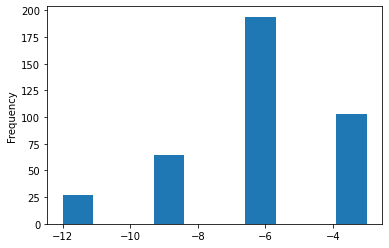

In [7]:
df.studytime_granular.plot.hist()
# ВЫВОД: пока оставим параметр для дальнейшего исследования

In [8]:
df.shape

(395, 30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   family_size          368 non-null    object 
 5   parents_status       350 non-null    object 
 6   mother_education     392 non-null    float64
 7   father_education     371 non-null    float64
 8   mother_job           376 non-null    object 
 9   father_job           359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  travel_time          367 non-null    float64
 13  study_time           388 non-null    float64
 14  failures             373 non-null    float64
 15  school_support       386 non-null    obj

In [10]:
# количество пропусков по столбцам
null_data = df.isnull().sum()
null_data[null_data > 0]

address                17
family_size            27
parents_status         45
mother_education        3
father_education       24
mother_job             19
father_job             36
reason                 17
guardian               31
travel_time            28
study_time              7
failures               22
school_support          9
family_support         39
paid                   40
activities             14
nursery                16
studytime_granular      7
higher                 20
internet               34
romantic               31
family_relationship    27
free_time              11
go_out                  8
health                 15
absences               12
score                   6
dtype: int64

In [11]:
# проверяем нет ли в каких-либо колонках более 30% пропусков, если да, то такие колонки удаляем
cols_for_drop = [col for col in df.columns if df[col].isnull().sum()
                 > df[col].shape[0] * 0.3]
cols_for_drop
# reduced_df = df.drop(cols_for_drop, axis=1)
# reduced_df

[]

In [12]:
# отбор количественных параметров
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'mother_education' 'father_education' 'travel_time' 'study_time'
 'failures' 'studytime_granular' 'family_relationship' 'free_time'
 'go_out' 'health' 'absences' 'score']


In [13]:
# отбор номинативных параметров
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'family_size' 'parents_status' 'mother_job'
 'father_job' 'reason' 'guardian' 'school_support' 'family_support' 'paid'
 'activities' 'nursery' 'higher' 'internet' 'romantic']


<AxesSubplot:ylabel='Frequency'>

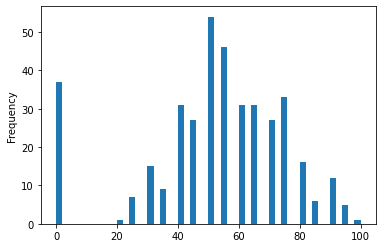

In [14]:
# строим гистограмму для score
df.score.plot.hist(bins=50)
# ВЫВОД: выбросов нет

<AxesSubplot:ylabel='Frequency'>

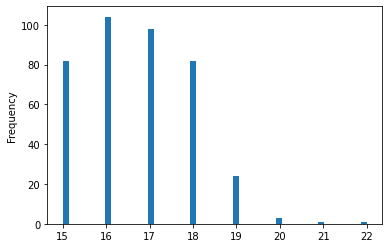

In [15]:
df.age.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

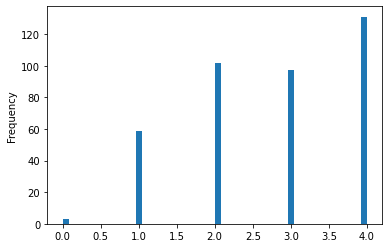

In [16]:
df.mother_education.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

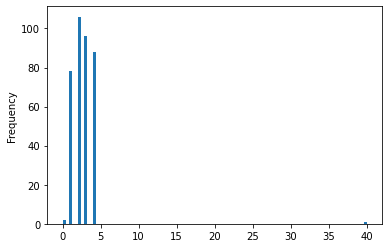

In [17]:
df.father_education.plot.hist(bins=100)
# ВЫВОД: есть выброс

In [18]:
# ищем строку с выбросом
df[df.father_education > 4]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relationship,free_time,go_out,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [19]:
# заменяем значение выброса больше 4 на NaN
df.loc[df['father_education'] > 4, 'father_education'] = np.nan

In [20]:
df[df.father_education > 4]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relationship,free_time,go_out,health,absences,score


<AxesSubplot:ylabel='Frequency'>

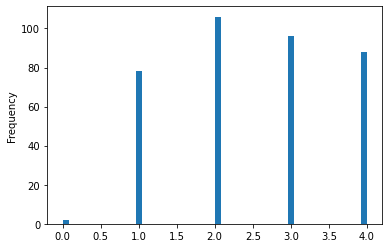

In [21]:
df.father_education.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

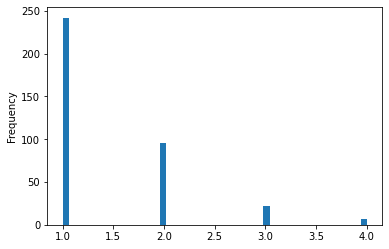

In [22]:
df.travel_time.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

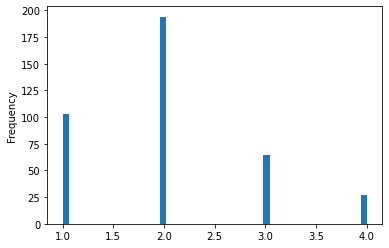

In [23]:
df.study_time.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

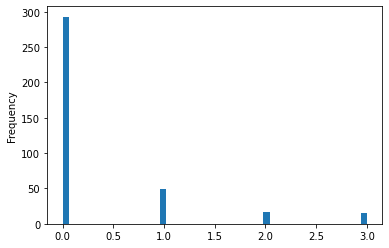

In [24]:
df.failures.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

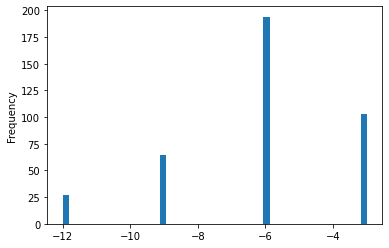

In [25]:
df.studytime_granular.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

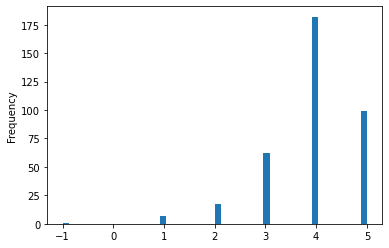

In [26]:
df.family_relationship.plot.hist(bins=50)
# ВЫВОД: есть выброс

In [27]:
# ищем строку с выбросом
df[df.family_relationship < 1]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relationship,free_time,go_out,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [28]:
# заменяем выброс со значением меньше 1 на NaN
df.loc[df['family_relationship'] < 1, 'family_relationship'] = np.nan

In [29]:
df[df.family_relationship < 1]

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relationship,free_time,go_out,health,absences,score


<AxesSubplot:ylabel='Frequency'>

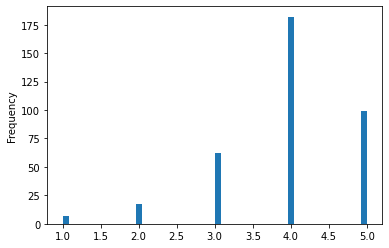

In [30]:
df.family_relationship.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

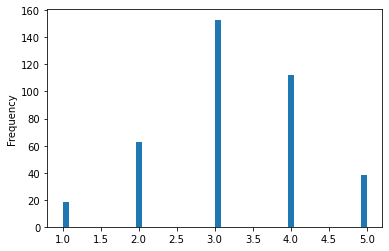

In [31]:
df.free_time.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

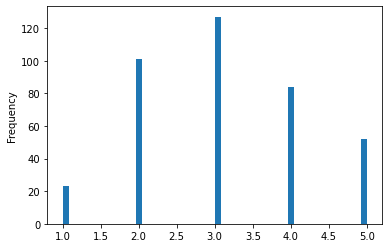

In [32]:
df.go_out.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

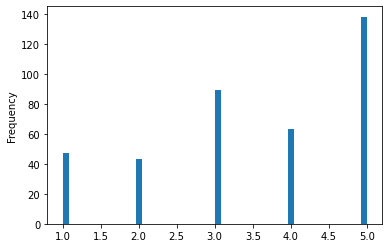

In [33]:
df.health.plot.hist(bins=50)
# ВЫВОД: все нормально

<AxesSubplot:ylabel='Frequency'>

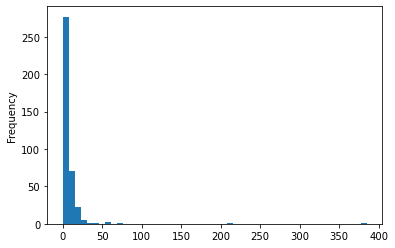

In [34]:
df.absences.plot.hist(bins=50)
# ВЫВОД: есть выбросы

In [35]:
# смотрим стат данные по absences
df.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<AxesSubplot:xlabel='absences'>

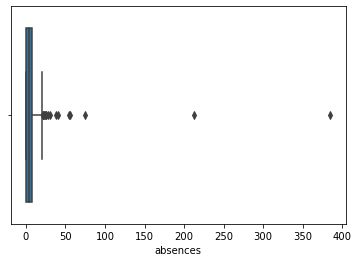

In [36]:
sns.boxplot(data=df, x='absences')

In [37]:
# отфильтровываем значение "вне логики" = больше чем дней в году = больше 365
df = df[df.absences < 365]

<AxesSubplot:xlabel='absences'>

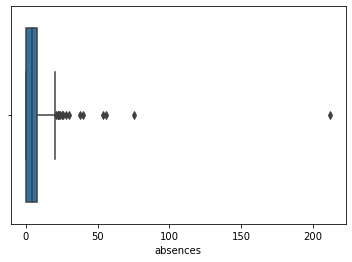

In [38]:
sns.boxplot(data=df, x='absences')

In [39]:
# проверяем распределение absence на нормальность
# тест Шапиро-Уилк print(‘Statistics=%.3f, p-value=%.3f’ % (stat, p))
stat, p = scipy.stats.shapiro(df['absences'])
alpha = 0.05

In [40]:
# p > alpha - гипоза о нормальности принята
stat, p

(0.37204742431640625, 3.3924323858462255e-34)

In [41]:
# находим строки со значениями absence бол3 стандартных отклонений и присваиваем им значение NaN
df[((df.absences - df.absences.mean()) / df.absences.std()).abs() > 3] = np.nan

<AxesSubplot:xlabel='absences'>

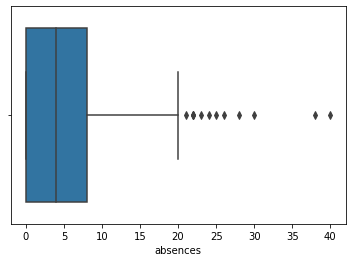

In [42]:
sns.boxplot(data=df, x='absences')

In [43]:
# замена пропусков на медиану для числовых признаков
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('внесены пропущенные данные для: {}'.format(col))
        df['{}_inplaced'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

внесены пропущенные данные для: age
внесены пропущенные данные для: mother_education
внесены пропущенные данные для: father_education
внесены пропущенные данные для: travel_time
внесены пропущенные данные для: study_time
внесены пропущенные данные для: failures
внесены пропущенные данные для: studytime_granular
внесены пропущенные данные для: family_relationship
внесены пропущенные данные для: free_time
внесены пропущенные данные для: go_out
внесены пропущенные данные для: health
внесены пропущенные данные для: absences
внесены пропущенные данные для: score


In [44]:
df.isnull().sum().head(30)

school                  4
sex                     4
age                     0
address                19
family_size            28
parents_status         46
mother_education        0
father_education        0
mother_job             22
father_job             39
reason                 21
guardian               34
travel_time             0
study_time              0
failures                0
school_support         13
family_support         41
paid                   43
activities             18
nursery                20
studytime_granular      0
higher                 23
internet               37
romantic               35
family_relationship     0
free_time               0
go_out                  0
health                  0
absences                0
score                   0
dtype: int64

### КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

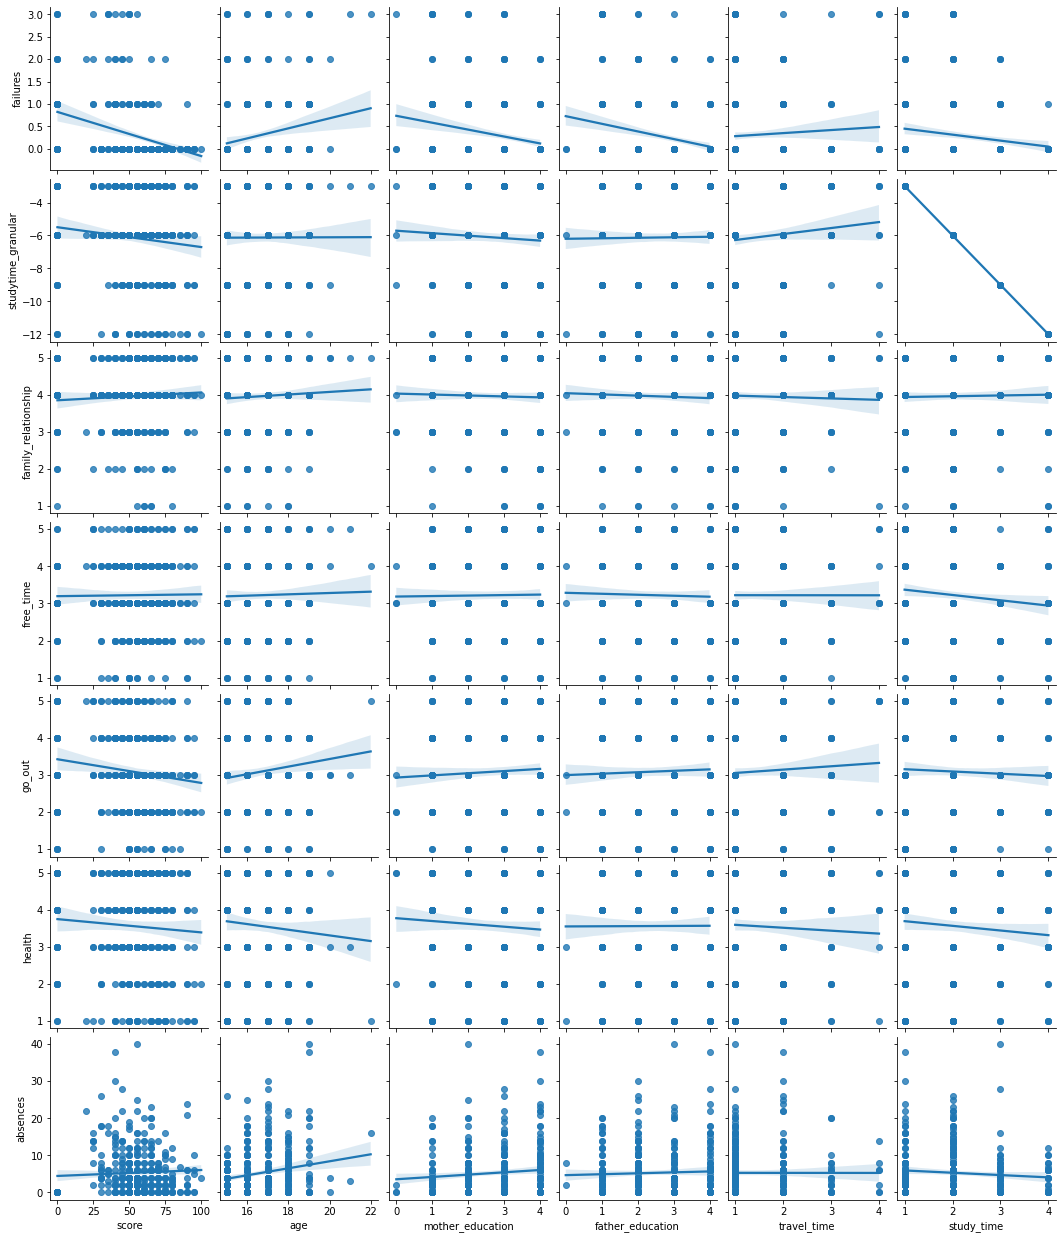

In [45]:
sns.pairplot(df, x_vars=['score', 'age', 'mother_education', 'father_education',
                         'travel_time', 'study_time', ], y_vars=['failures', 'studytime_granular',
                                                                 'family_relationship', 'free_time',
                                                                 'go_out', 'health', 'absences'], kind='reg')

In [46]:
df.corr().head(13)

,age,mother_education,father_education,travel_time,study_time,failures,studytime_granular,family_relationship,free_time,go_out,health,absences,score,age_inplaced,mother_education_inplaced,father_education_inplaced,travel_time_inplaced,study_time_inplaced,failures_inplaced,studytime_granular_inplaced,family_relationship_inplaced,free_time_inplaced,go_out_inplaced,health_inplaced,absences_inplaced,score_inplaced
age,1.000000,-0.162253,-0.147727,0.084915,-0.002298,0.198888,0.002298,0.051533,0.023231,0.118697,-0.071056,0.188900,-0.144249,0.025771,0.018791,-0.029815,-0.028876,0.011614,-0.063830,0.011614,0.006213,0.070902,0.033247,0.028745,0.025771,0.107168
mother_education,-0.162253,1.000000,0.601607,-0.174623,0.065059,-0.236606,-0.065059,-0.032414,0.014850,0.058368,-0.061608,0.108359,0.198933,0.022212,0.029501,0.052831,-0.021310,0.001905,0.067879,0.001905,-0.006118,-0.008958,-0.016130,-0.083027,0.022212,-0.093002
father_education,-0.147727,0.601607,1.000000,-0.126292,-0.012923,-0.252344,0.012923,-0.040963,-0.028458,0.037428,0.003412,0.041942,0.104286,-0.044938,-0.059685,-0.125211,-0.042498,-0.067858,0.010062,-0.067858,-0.038929,-0.085206,-0.050213,-0.122778,-0.044938,-0.100587
travel_time,0.084915,-0.174623,-0.126292,1.000000,-0.098553,0.065575,0.098553,-0.030472,-0.000618,0.056654,-0.039807,-0.000805,-0.059135,-0.062217,-0.082634,-0.086640,-0.182880,-0.043473,0.003740,-0.043473,-0.067596,0.004266,-0.108922,-0.032726,-0.062217,0.007003
study_time,-0.002298,0.065059,-0.012923,-0.098553,1.000000,-0.157423,-1.000000,0.020554,-0.123478,-0.047281,-0.077999,-0.083029,0.107929,-0.005131,-0.030060,0.044556,-0.015083,-0.007748,-0.038238,-0.007748,-0.026241,0.006863,0.026763,0.045949,-0.005131,0.012806
failures,0.198888,-0.236606,-0.252344,0.065575,-0.157423,1.000000,0.157423,0.015653,0.093467,0.087438,0.065653,0.115298,-0.312805,-0.044641,-0.031871,-0.013304,0.014804,0.005332,-0.117278,0.005332,0.005712,-0.045498,-0.035986,-0.031618,-0.044641,0.029579
studytime_granular,0.002298,-0.065059,0.012923,0.098553,-1.000000,0.157423,1.000000,-0.020554,0.123478,0.047281,0.077999,0.083029,-0.107929,0.005131,0.030060,-0.044556,0.015083,0.007748,0.038238,0.007748,0.026241,-0.006863,-0.026763,-0.045949,0.005131,-0.012806
family_relationship,0.051533,-0.032414,-0.040963,-0.030472,0.020554,0.015653,-0.020554,1.000000,0.158542,0.071592,0.102595,-0.073342,0.055843,0.004732,0.006284,0.001606,-0.008229,0.027362,0.073306,0.027362,0.013669,0.025291,-0.044454,0.038732,0.004732,0.047578
free_time,0.023231,0.014850,-0.028458,-0.000618,-0.123478,0.093467,0.123478,0.158542,1.000000,0.288988,0.052761,-0.016621,0.011682,-0.023511,0.008869,0.036009,-0.059402,-0.017774,-0.008384,-0.017774,-0.008841,-0.044578,-0.025745,0.021919,-0.023511,0.035409
go_out,0.118697,0.058368,0.037428,0.056654,-0.047281,0.087438,0.047281,0.071592,0.288988,1.000000,-0.005451,0.106733,-0.132593,-0.008906,-0.011829,0.002424,-0.086945,-0.013449,0.014798,-0.013449,0.009499,-0.068084,-0.015592,0.002317,-0.008906,0.034120


<AxesSubplot:xlabel='study_time', ylabel='studytime_granular'>

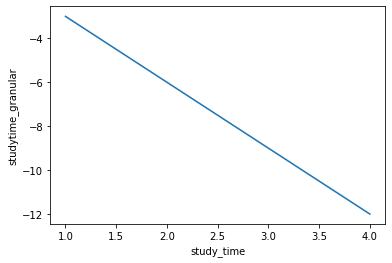

In [47]:
sns.lineplot(data=df, x="study_time", y="studytime_granular")
# ВЫВОД: у параметров studytime и studytime_granular идеальная обратная (отрицательная) кореляция,
# параметр studytime_granulat можно исключить

### НОМИНАТИВНЫЕ ПРИЗНАКИ

In [48]:
df.dtypes.head(30)

school                  object
sex                     object
age                    float64
address                 object
family_size             object
parents_status          object
mother_education       float64
father_education       float64
mother_job              object
father_job              object
reason                  object
guardian                object
travel_time            float64
study_time             float64
failures               float64
school_support          object
family_support          object
paid                    object
activities              object
nursery                 object
studytime_granular     float64
higher                  object
internet                object
romantic                object
family_relationship    float64
free_time              float64
go_out                 float64
health                 float64
absences               float64
score                  float64
dtype: object

In [49]:
# функция оценки номинативных переменных
def info_column(x, n):
    series_x = pd.DataFrame(df[x].value_counts())
    frequent = (df[x].value_counts() > n).sum()
    uniqe = df[x].nunique()
    display(series_x)
    print(f'Значений, встретившихся в столбце более {n} раз:', frequent)
    print('Уникальных значений:', uniqe)

In [50]:
info_column('school', 10)

,school
GP,334
MS,44


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [51]:
info_column('sex', 10)

,sex
F,200
M,178


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [52]:
info_column('address', 10)

,address
U,284
R,79


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [53]:
info_column('family_size', 10)

,family_size
GT3,254
LE3,100


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [54]:
info_column('parents_status', 10)

,parents_status
T,302
A,34


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [55]:
info_column('mother_job', 10)

,mother_job
other,126
services,93
at_home,56
teacher,53
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


In [56]:
info_column('father_job', 10)

,father_job
other,191
services,96
teacher,26
at_home,16
health,14


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


In [57]:
info_column('reason', 10)

,reason
course,130
home,101
reputation,98
other,32


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


In [58]:
info_column('guardian', 10)

,guardian
mother,237
father,84
other,27


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3


In [59]:
info_column('school_support', 10)

,school_support
no,321
yes,48


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [60]:
info_column('family_support', 10)

,family_support
yes,210
no,131


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [61]:
info_column('paid', 10)

,paid
no,192
yes,147


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [62]:
info_column('activities', 10)

,activities
yes,187
no,177


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [63]:
info_column('nursery', 10)

,nursery
yes,287
no,75


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [64]:
info_column('higher', 10)

,higher
yes,343
no,16


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [65]:
info_column('internet', 10)

,internet
yes,290
no,55


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [66]:
info_column('romantic', 10)

,romantic
no,228
yes,119


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


In [67]:
# замена пропусков на наиболее часто встречающееся значение (describe.'top')для категориальных признаков
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('внесены пропущенные данные для: {}'.format(col))
        df['{}_inplaced'.format(col)] = missing

        top = df[col].describe()['top']
        df[col] = df[col].fillna(top)

внесены пропущенные данные для: school
внесены пропущенные данные для: sex
внесены пропущенные данные для: address
внесены пропущенные данные для: family_size
внесены пропущенные данные для: parents_status
внесены пропущенные данные для: mother_job
внесены пропущенные данные для: father_job
внесены пропущенные данные для: reason
внесены пропущенные данные для: guardian
внесены пропущенные данные для: school_support
внесены пропущенные данные для: family_support
внесены пропущенные данные для: paid
внесены пропущенные данные для: activities
внесены пропущенные данные для: nursery
внесены пропущенные данные для: higher
внесены пропущенные данные для: internet
внесены пропущенные данные для: romantic


In [68]:
# распределение score в зависмости от категориальных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

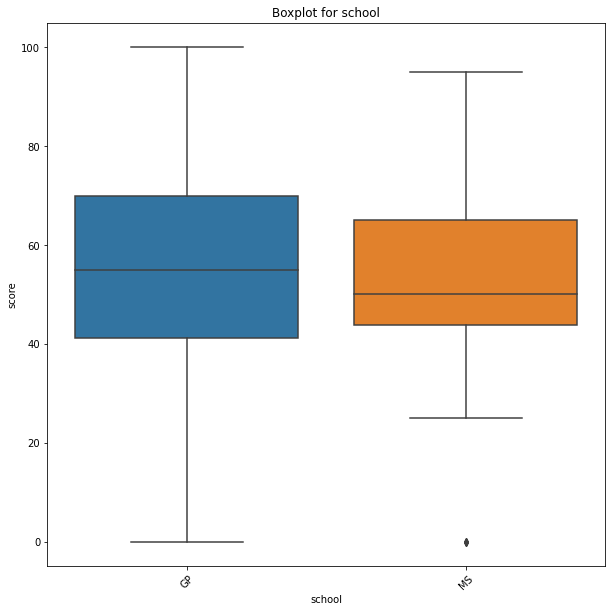

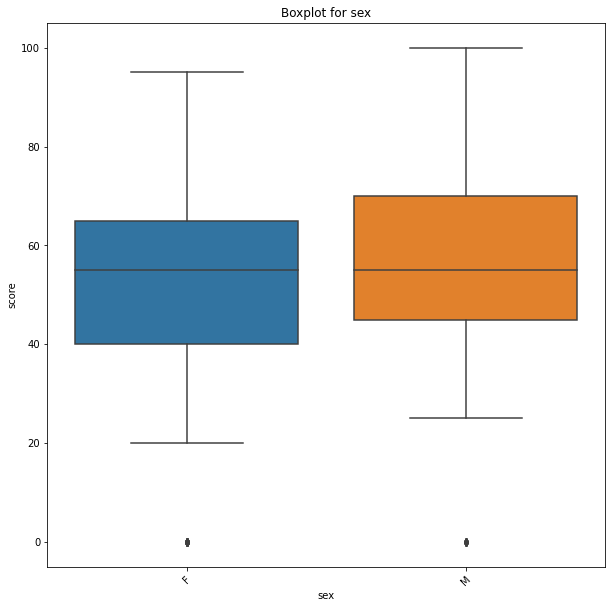

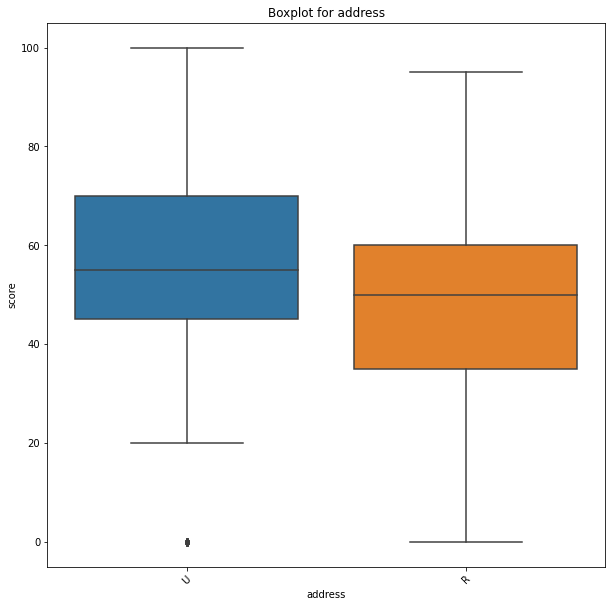

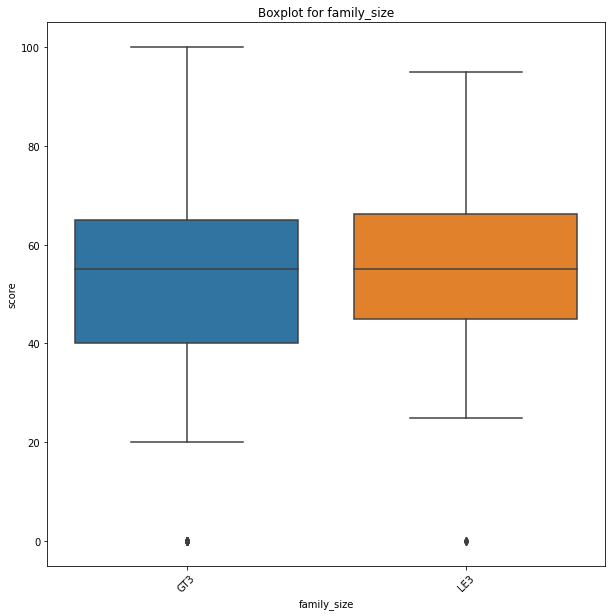

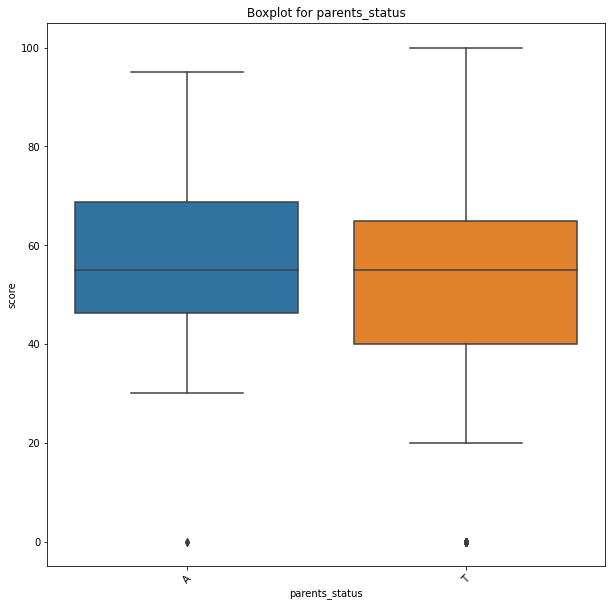

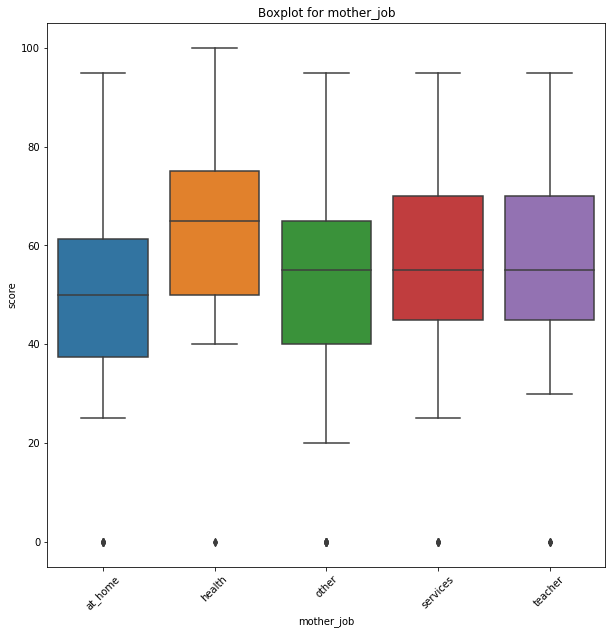

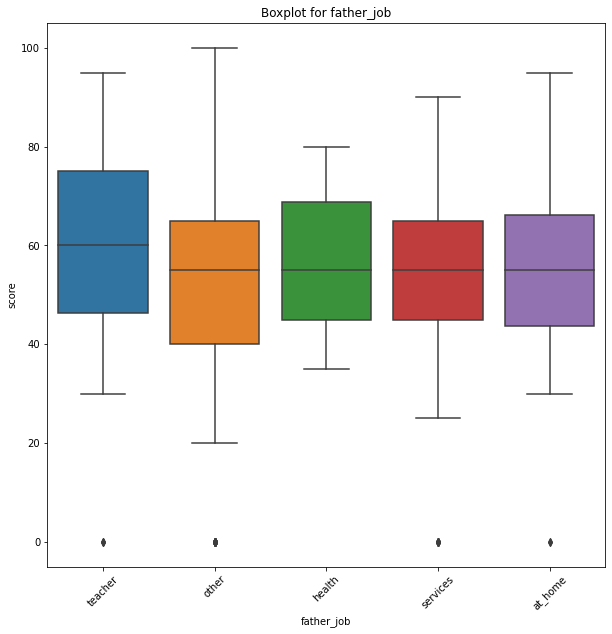

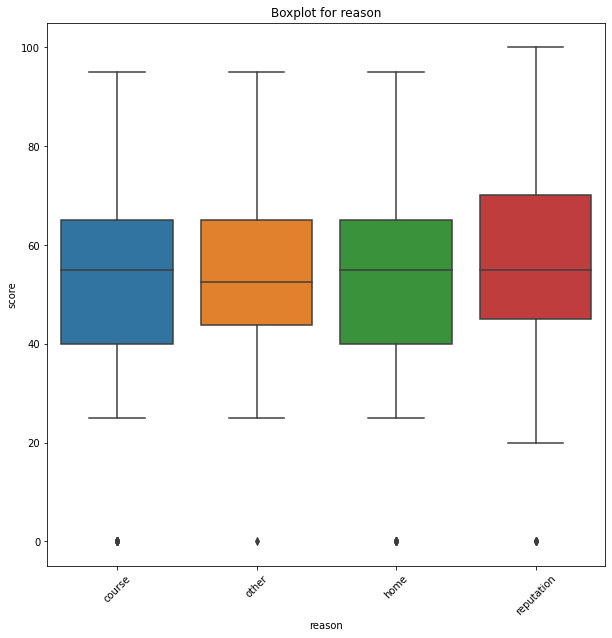

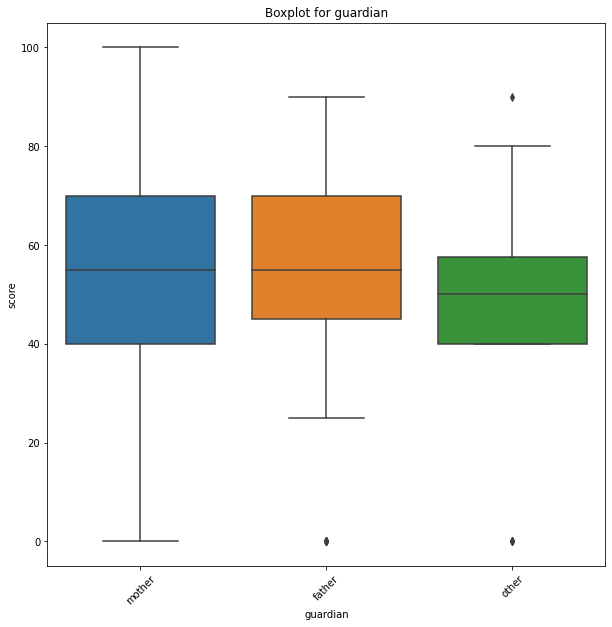

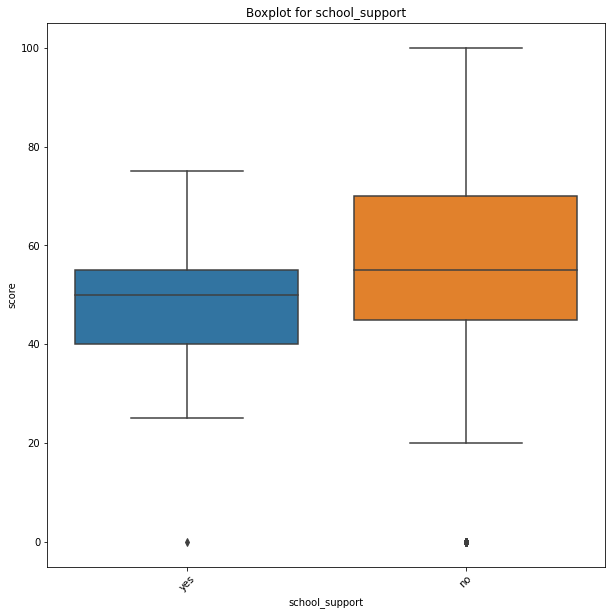

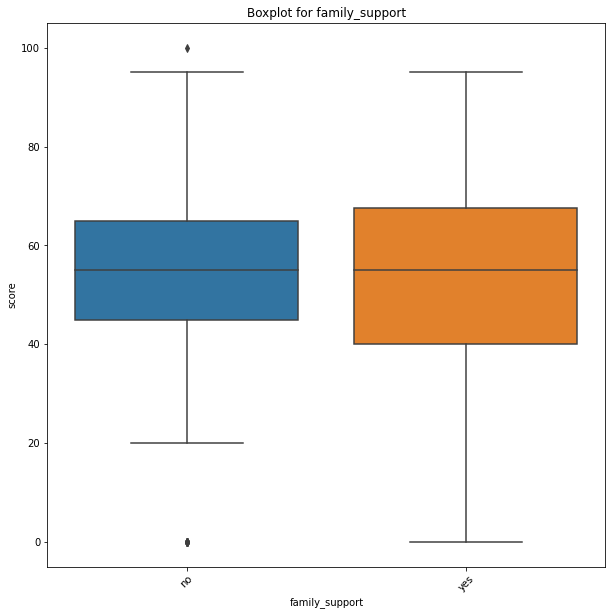

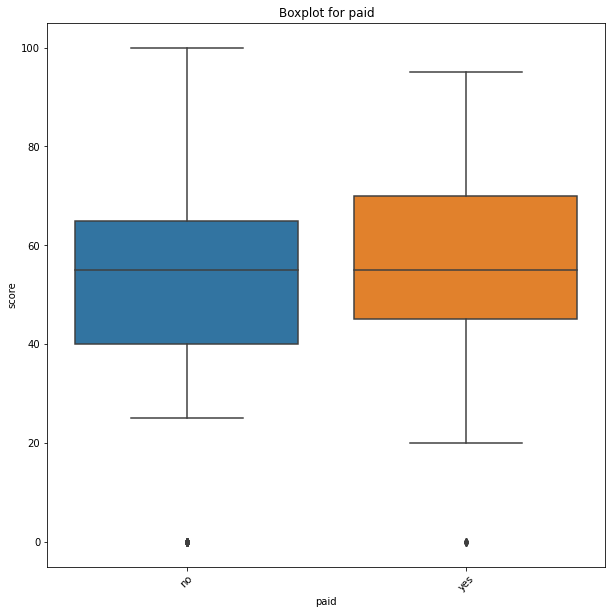

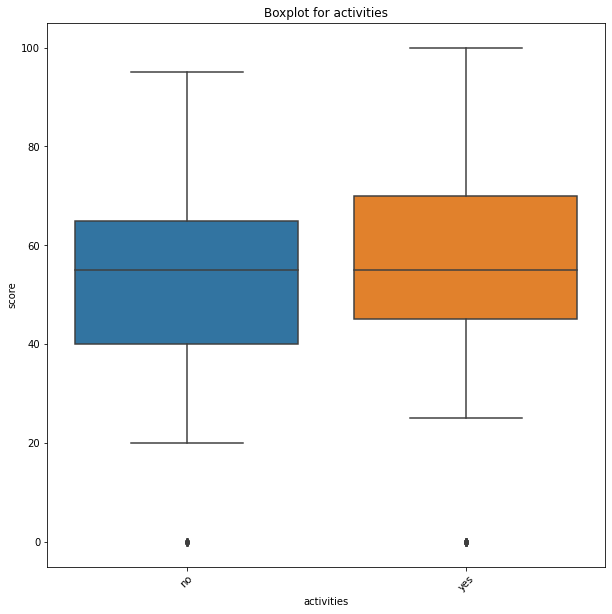

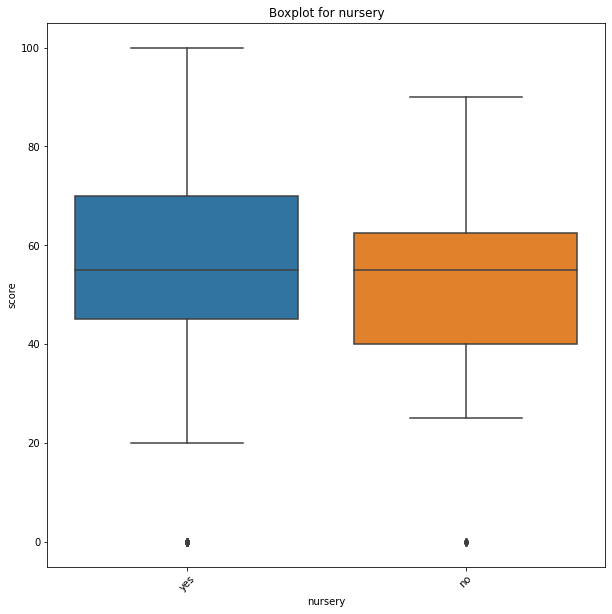

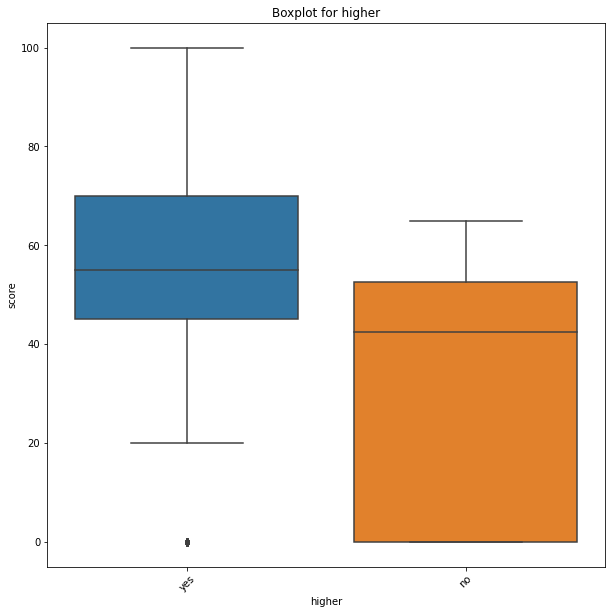

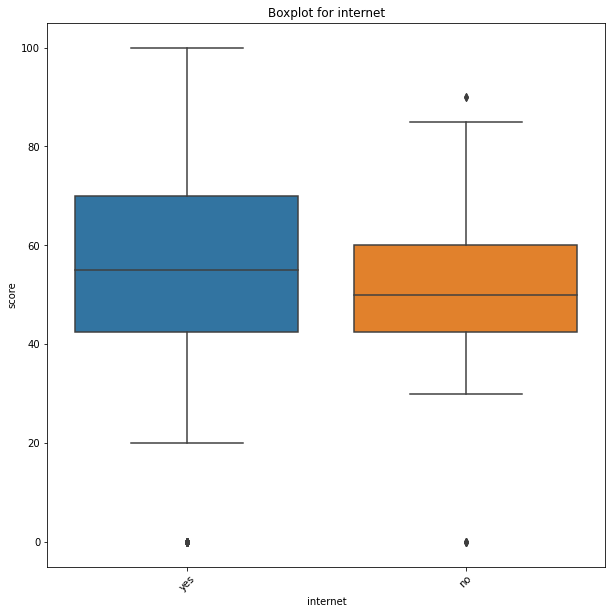

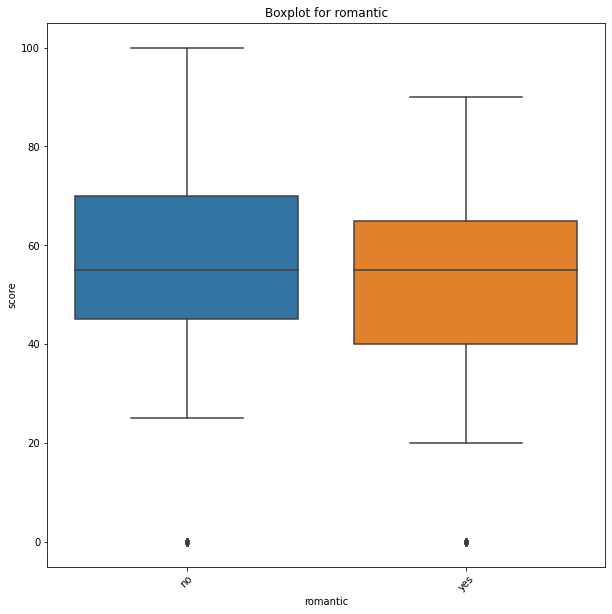

In [69]:
for col in ['school', 'sex', 'address', 'family_size', 'parents_status', 'mother_job',
            'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [70]:
from itertools import combinations
from scipy.stats import ttest_ind

# тест Стьюдента
# def get_stat_dif(column):
#    cols = df.loc[:, column].value_counts()
#    combinations_all = list(combinations(cols, 2))
#    for comb in combinations_all:
#        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
#                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
#        <= 0.05/len(combinations_all):  # Учли поправку Бонферони
#            print('Найдены статистически значимые различия для колонки', column)
#            break
# ВОПРОС!!!! Данный код не дает вывод данных

In [71]:
# тест Стьдента для категориальных параметров
# for col in ['school', 'sex', 'address', 'family_size', 'parents_status', 'mother_job',
#            'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid',
#            'activities', 'nursery', 'higher', 'internet', 'romantic']:
#    get_stat_dif(col)

In [72]:
# тест Стьдента для числовых параметров
# for col in ['score', 'age', 'mother_education', 'father_education', 'travel_time', 'study_time',
#            'failures', 'studytime_granular', 'family_relationship', 'free_time', 'go_out', 'health', 'absences']:
#    get_stat_dif(col)

In [73]:
# тест ANOVA (номинативные параметры)

from scipy import stats
from scipy.stats import f_oneway


def get_stat_anova(col, df):
    var_list = []
    cols = df.dropna()[col].unique()
    for item in cols:
        var_list.append(list(df[df[col] == item]['score']))
    print(f_oneway(*var_list))


for col in ['school', 'sex', 'address', 'family_size', 'parents_status', 'mother_job',
            'father_job', 'reason', 'guardian', 'school_support', 'family_support', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_anova(col, df)

# По результатам теста оставляем для построения модели номинативные парметры:
# sex, address, mother_job, higher, romantic
# на свое усмотрение также оставляем параметры со значением p-value = 0.07:
# school_support, paid
# (значение p-value < 0,05, H0 отклоняется и параметр является существенным)

F_onewayResult(statistic=0.4679284817045091, pvalue=0.49435864561661025)
F_onewayResult(statistic=3.915754299189526, pvalue=0.04855711758740846)
F_onewayResult(statistic=7.293340815356535, pvalue=0.007230693028669437)
F_onewayResult(statistic=2.3438031916298314, pvalue=0.12661416172231163)
F_onewayResult(statistic=0.9747809376567054, pvalue=0.3241189381367825)
F_onewayResult(statistic=3.0487839911412817, pvalue=0.017102012382496617)
F_onewayResult(statistic=0.5277209392480273, pvalue=0.7154308021096449)
F_onewayResult(statistic=1.1763701841368626, pvalue=0.3185155232887791)
F_onewayResult(statistic=0.8575667115264524, pvalue=0.42501444518520126)
F_onewayResult(statistic=3.2902488901612874, pvalue=0.07048104717155147)
F_onewayResult(statistic=0.011609014006309702, pvalue=0.9142547302749199)
F_onewayResult(statistic=3.2941565117211042, pvalue=0.07031504766540912)
F_onewayResult(statistic=0.0027811004236619713, pvalue=0.957969855527937)
F_onewayResult(statistic=1.1241811370711916, pvalue=

In [74]:
# тест ANOVA (количественные параметры)

from scipy import stats
from scipy.stats import f_oneway


def get_stat_anova(col, df):
    var_list = []
    cols = df.dropna()[col].unique()
    for item in cols:
        var_list.append(list(df[df[col] == item]['score']))
    print(f_oneway(*var_list))


for col in ['age', 'mother_education', 'father_education', 'travel_time', 'study_time', 'failures',
            'studytime_granular', 'family_relationship', 'free_time', 'go_out', 'health', 'absences']:
    get_stat_anova(col, df)

# По результатам теста оставляем для построения модели количественные параметры:
# age, mother_education, go_out, absences, failures
# на свое усмотрение также оставляем параметры со значением p-value = 0.10:
# study_time, studytime_granular, но так как они отрицательно коррелируеются, оставляем только study_time
# (значение p-value < 0,05, H0 отклоняется и параметр является существенным)

F_onewayResult(statistic=2.1788549421503083, pvalue=0.0353815506021782)
F_onewayResult(statistic=5.232788602120326, pvalue=0.00041169419571050866)
F_onewayResult(statistic=1.5564172041430735, pvalue=0.18532004535723987)
F_onewayResult(statistic=0.5573537784927098, pvalue=0.6434947392675996)
F_onewayResult(statistic=2.0456554984510147, pvalue=0.10704525537231013)
F_onewayResult(statistic=15.606307159405524, pvalue=1.3709687735113792e-09)
F_onewayResult(statistic=2.0456554984510147, pvalue=0.10704525537231013)
F_onewayResult(statistic=0.6614396690168151, pvalue=0.6191372833231406)
F_onewayResult(statistic=1.408779446749522, pvalue=0.23037964010290654)
F_onewayResult(statistic=3.344820903576217, pvalue=0.010419578547070879)
F_onewayResult(statistic=1.1965290228646928, pvalue=0.31187764043030225)
F_onewayResult(statistic=1.6534789697096428, pvalue=0.018868827708244888)


In [76]:
# Датафрейм для использования при построении модели
df_for_model = df.loc[:, ['sex', 'address', 'mother_job', 'higher', 'romantic', 'school_support', 'paid',
                          'age', 'mother_education', 'go_out', 'absences', 'study_time', 'failures']]
df_for_model.head()

,sex,address,mother_job,higher,romantic,school_support,paid,age,mother_education,go_out,absences,study_time,failures
0,F,U,at_home,yes,no,yes,no,18.0,4.0,4.0,6.0,2.0,0.0
1,F,U,at_home,yes,no,no,no,17.0,1.0,3.0,4.0,2.0,0.0
2,F,U,at_home,yes,no,yes,no,15.0,1.0,2.0,10.0,2.0,3.0
3,F,U,health,yes,yes,no,yes,15.0,4.0,2.0,2.0,3.0,0.0
4,F,U,other,yes,no,no,yes,16.0,3.0,2.0,4.0,2.0,0.0
